## Deceleration radius
Here we make an estimation for the ratio $R_{dec}/R_{*}$ as function of the beta law index β and the adimentional value η. For this we work in mks and make an integration over values of beta using different guesses of the ratio


The values of $M_0$ are obtained from [Shing-Chi Leung+2022](https://https://ui.adsabs.harvard.edu/abs/2022MNRAS.516.1008L/abstract), and the values for $\dot M$ and Rstar are obtained from  [Hinkle+25](https://) for T-Crb system

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

R_sun= 6.96E8      # en m
R_star= 54*R_sun
un_pc= 3.086E16    # en m
R_dec= np.linspace(un_pc*1E-5, un_pc*1E-1,10) #vamos a jugar con un Rdec entre 1pcE-5 y 1pc*E-1 considerando que para SNe Rdec es del orden de parsecs
ratio = R_dec/R_star   # de este modo el ratio nos da entre la unidad y las decenas de miles


#valores para definir eta, ojo que podriamos mover o bien la mass loss rate Mdot o la masa eyectada M0, en este caso movemos M0
M_d=  1E-8                  # en Msun/yr
M_dot= M_d/(3.154E7)        # en Msun/s
v_inf= 3E4                  # en m/s
Mo= np.logspace(-7,-5,100)                    # en Msun


eta= Mo*v_inf/(M_dot*R_star)

print( 'valores min y max del ratio',min(ratio),max(ratio))
print('valores min y max de eta',min(eta),max(eta))

valores min y max del ratio 8.210940825883355 82109.40825883354
valores min y max de eta 251.75606641123883 25175.606641123886


In [ ]:
def integrand(x,beta):
  base= 1.0 - 1/x
  return 1.0/(base)**beta

def integral_def(ratio_val,beta):
  lower_limit= 1.0
  upper_limit= ratio_val
  integral, error= quad(integrand, lower_limit, upper_limit, args=(beta))
  return integral, error

for beta in [0.5,0.7,0.9]:
  print(f"beta={beta:.1f}")
  for r in ratio:
    val, err= integral_def(r, beta)
    print(f"  ratio={r:.2f} -> I={val:.2f} (error estimado={err:.2e})")

beta=0.5
  ratio=8.21 -> I=9.41 (error estimado=1.35e-08)
  ratio=9130.57 -> I=9135.32 (error estimado=1.93e-05)
  ratio=18252.92 -> I=18258.02 (error estimado=1.93e-04)
  ratio=27375.28 -> I=27380.58 (error estimado=2.60e-04)
  ratio=36497.63 -> I=36503.08 (error estimado=1.93e-04)
  ratio=45619.99 -> I=45625.54 (error estimado=4.16e-04)
  ratio=54742.34 -> I=54747.99 (error estimado=8.12e-04)
  ratio=63864.70 -> I=63870.42 (error estimado=9.14e-04)
  ratio=72987.05 -> I=72992.85 (error estimado=6.58e-04)
  ratio=82109.41 -> I=82115.26 (error estimado=7.39e-04)
beta=0.7
  ratio=8.21 -> I=11.36 (error estimado=1.49e-07)
  ratio=9130.57 -> I=9138.70 (error estimado=2.80e-06)
  ratio=18252.92 -> I=18261.54 (error estimado=1.50e-04)
  ratio=27375.28 -> I=27384.18 (error estimado=3.37e-05)
  ratio=36497.63 -> I=36506.73 (error estimado=1.50e-04)
  ratio=45619.99 -> I=45629.24 (error estimado=1.79e-06)
  ratio=54742.34 -> I=54751.73 (error estimado=5.50e-04)
  ratio=63864.70 -> I=63874.19 (

As we can see the integral values for every beta and ratio value is very close to the ratio itself, and for beta closer to 1 we get that the integral is getting larger than the ratio.

 So we performed the integration for 3 diff beta values, now we look for 100 values of beta but considering a fixed ratio for every beta

In [ ]:
beta= np.linspace( 0.1, 0.9,100)

I1= [] # para min ratio
for b in beta:
    val, err= integral_def(ratio[0], b)
    I1.append(val)
print( I1)

I10=[] #para max ratio
for b in beta:
    val, err= integral_def(ratio[-1], b)
    I10.append(val)
print( I10)

[7.5322553658606894, 7.559853735885804, 7.587721250735135, 7.615863774509577, 7.644287372161658, 7.672998318634847, 7.702003108516186, 7.731308466236214, 7.760921356854095, 7.790848997465245, 7.821098869279111, 7.851678730407427, 7.882596629417479, 7.913860919702227, 7.945480274726704, 7.977463704213651, 8.009820571336883, 8.04256061099753, 8.075693949262858, 8.109231124056773, 8.143183107196288, 8.177561327878797, 8.212377697732828, 8.24764463755574, 8.283375105873498, 8.319582629469338, 8.356281336042004, 8.393485989171216, 8.431212025781049, 8.46947559631527, 8.508293607856425, 8.547683770443987, 8.587664646874023, 8.628255706289739, 8.669477381905885, 8.711351133244719, 8.75389951330186, 8.797146241104972, 8.841116280180266, 8.885835923494142, 8.931332885507842, 8.97763640204941, 9.024777338790424, 9.07278830920875, 9.121703803020651, 9.17156032618504, 9.222396553719166, 9.274253496713737, 9.32717468511982, 9.381206368071217, 9.436397733741762, 9.49280115100327, 9.550472435449091, 

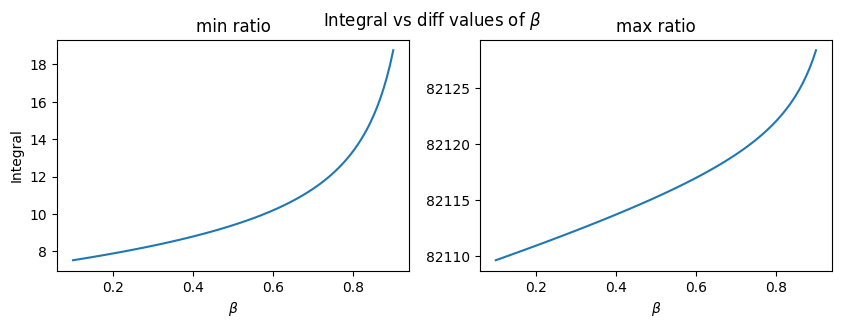

In [ ]:
fig, ax= plt.subplots(1,2,figsize=(10,3))
fig.suptitle(r'Integral vs diff values of $\beta$')

ax[0].set_title(r'min ratio')
ax[0].plot(beta,I1)
ax[0].set_xlabel(r'$\beta$')
ax[0].set_ylabel(r'Integral')

ax[1].set_title(r'max ratio')
ax[1].plot(beta,I10)
ax[1].set_xlabel(r'$\beta$')

plt.show()

De aca podemos ver que la integral cambia más cuando beta es alto y el ratio tiene un valor bajo, para el caso beta bajo y ratio alto la integral tiene casi el mismo valor del ratio

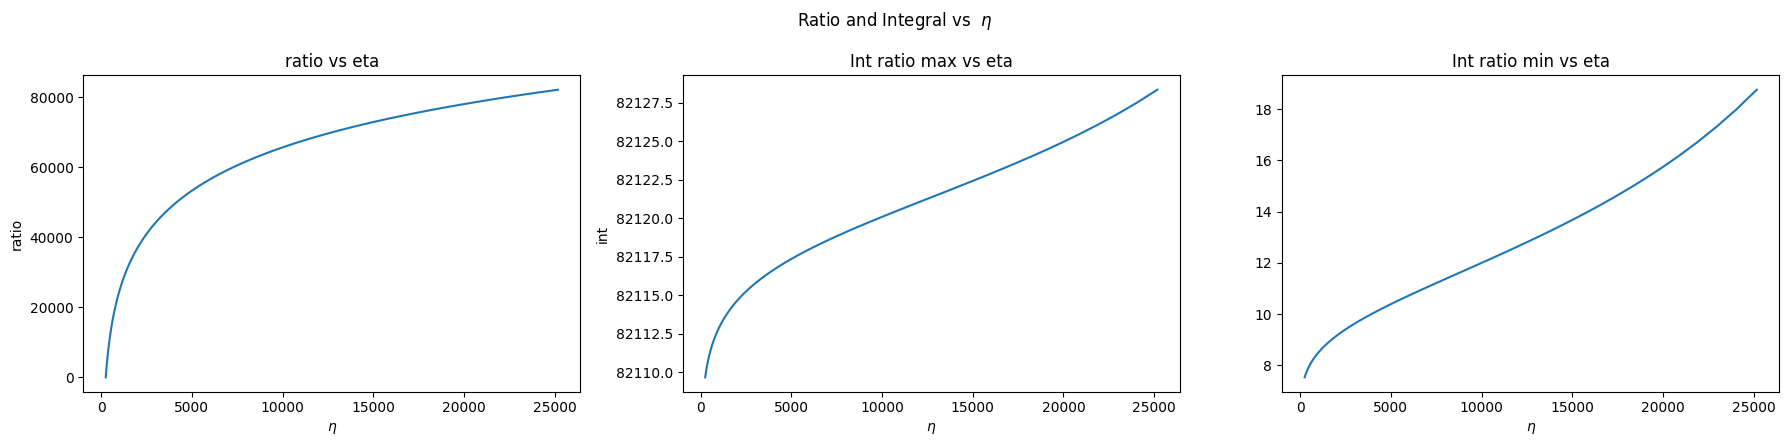

In [ ]:
R_dec= np.linspace(un_pc*1E-5, un_pc*1E-1,100) #ahora con 100 ratios
ratio = R_dec/R_star

fig, ax= plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle(r'Ratio and Integral vs  $\eta$')

ax[0].set_title(r'ratio vs eta')
ax[0].plot(eta,ratio)
ax[0].set_xlabel(r'$\eta$')
ax[0].set_ylabel(r'ratio')

ax[1].set_title(r'Int ratio max vs eta')
ax[1].plot(eta,I10)
ax[1].set_ylabel(r'int')
ax[1].set_xlabel(r'$\eta$')

ax[2].plot(eta,I1)
ax[2].set_title(r'Int ratio min vs eta')
ax[2].set_xlabel(r'$\eta$')

plt.tight_layout()
plt.show()



también cabe notar que la initial guess para Rdec puede ser más precisa, ya que queremos que la integral nos de el mismo valor que eta para cierta combinación de ratio y beta, por lo tanto debe moverse entre las centenas hasta las decenas de mil, i.e: min(eta)-max(eta) (250-25000)

In [ ]:
beta= np.linspace( 0.1, 0.9,10)
R_dec= np.linspace(un_pc*1E-4, un_pc*1E-1,10) # reducimos a 1E-4 hasta 1E-2

Mo= np.logspace(-7,-5,10)                    # en Msun
eta= Mo*v_inf/(M_dot*R_star)

ratio = R_dec/R_star
eta_g, beta_g = np.meshgrid(eta, beta)
ratio_g, beta_g = np.meshgrid(ratio, beta)

I = np.zeros((len(beta), len(ratio)))

for i, b in enumerate(beta):
    for j, r in enumerate(ratio):
        val, err = integral_def(r, b)
        I[i, j] = val
#here I stores the values of each integral with a ratio in every index

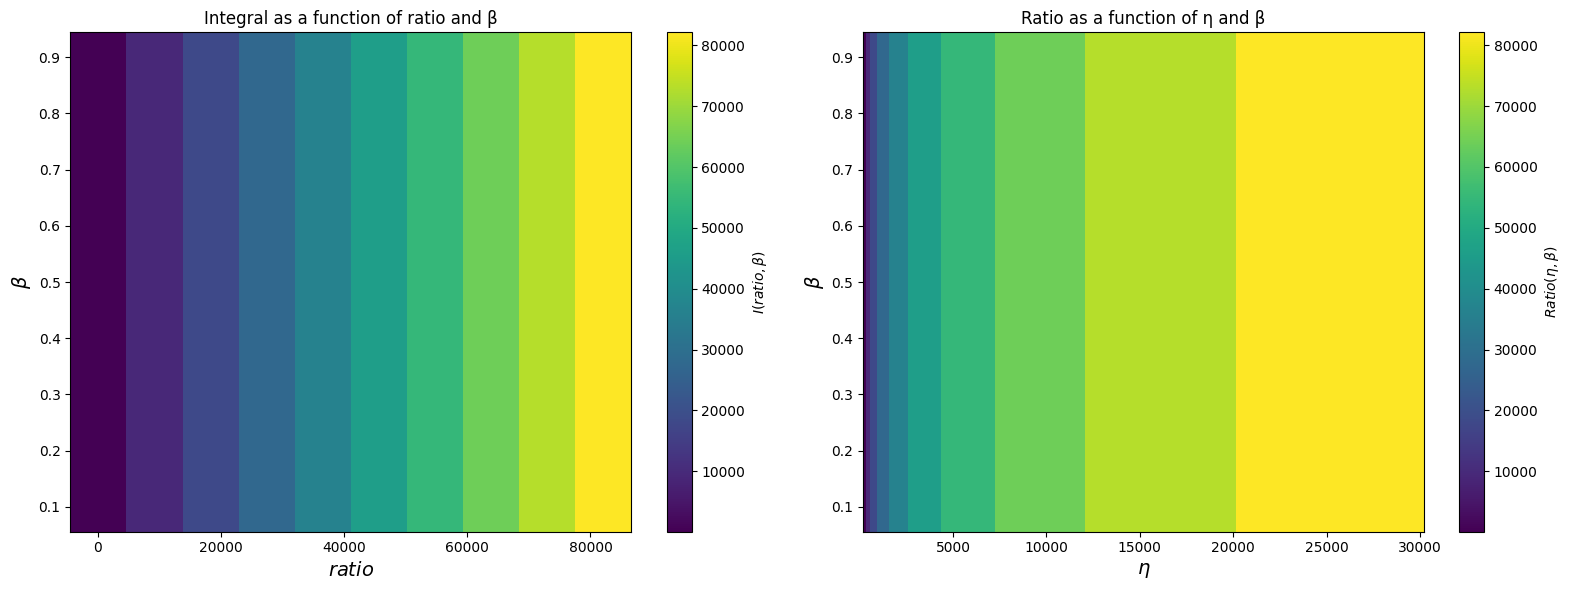

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16, 6))

# el plot en sí mismo
c = ax[0].pcolormesh(ratio_g, beta_g, I, shading='auto', cmap='viridis')
c2= ax[1].pcolormesh(eta_g, beta_g, ratio_g, shading='auto', cmap='viridis')


# labels and colorbar
ax[0].set_xlabel(r'$ratio$', fontsize=14)
ax[0].set_ylabel(r'$\beta$', fontsize=14)
ax[0].set_title('Integral as a function of ratio and β')

fig.colorbar(c, ax=ax[0], label=r'$I(ratio, \beta)$')


# labels and colorbar
ax[1].set_xlabel(r'$\eta$', fontsize=14)
ax[1].set_ylabel(r'$\beta$', fontsize=14)
ax[1].set_title('Ratio as a function of η and β')

fig.colorbar(c2, ax=ax[1], label=r'$Ratio(\eta, \beta)$')

plt.tight_layout()
plt.show()

Pero acá hasta el momento el ratio sigue siendo un valor que está acotado por las condiciones más que el resultado mismo de la integral, ya que la dependencia con beta es suave.


 Por lo tanto, podemos acotar el ratio si usamos $M_0$ más angosto => eta más angosto (ya que es el caso de SyRNe) y así Rdec debe ser más bajo, i.e:

In [ ]:
Mo= np.logspace(-7,-6,100)                    # en Msun
eta= Mo*v_inf/(M_dot*R_star)
R_dec= np.linspace(un_pc*1E-4, un_pc*1E-2,100) #ahora con 100 ratios
ratio = R_dec/R_star

print( 'valores min y max del ratio',min(ratio),max(ratio))
print('valores min y max de eta',min(eta),max(eta))

valores min y max del ratio 82.10940825883354 8210.940825883356
valores min y max de eta 251.75606641123883 2517.560664112388


Vemos que la mayor diferencia se da cuando comparamos el valor maximo del ratio con el valor máximo de eta, de modo que el ratio en realidad se debe mover entre aprox (1E-4 - 1E-3)pc

In [ ]:
R_dec= np.linspace(3*un_pc*1E-4, 3.05*un_pc*1E-3,100) #ahora con 100 ratios
ratio = R_dec/R_star
print( 'valores min y max del ratio',min(ratio),max(ratio))

valores min y max del ratio 246.32822477650063 2504.3369518944232


In [ ]:
I_1 =[]
for b in beta:
 val, err= integral_def(ratio[0],b)
 I_1.append(val)
 if 0.996 < val/min(eta) < 1.11:
  print(f"beta={b:.1f}")
  print(val)

beta=0.6
250.86959046852004
beta=0.7
252.34868980417698
beta=0.8
254.67473719433897
beta=0.9
260.0426307214406


In [ ]:
for b in beta:
 val, err= integral_def(ratio[-1],b)
 if 0.997 < val/max(eta) < 1.11:
  print(f"beta={b:.1f}")
  print(val)

beta=0.6
2510.3489869469386
beta=0.7
2512.034613889899
beta=0.8
2514.567217917469
beta=0.9
2520.141697126986


## Conclusión

Acotando el ratio para que la integral coincida con el valor de eta nos dice que el beta indicado es necesariamente mayor a 0.5 , por lo tanto nos quedamos con un valor de beta= 0.7 que es el que mejor coincide para obtener $Int(ratio,beta)=\eta$  De modo que a groso modo Rdec se debe mover entre (3E-4, 3.05E-3) pc lo cual es entre mil y 10 mil veces menor que el radio de desaceleración para una supernova.

## Actually solving for  Rdec

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import root_scalar


R_sun = 6.96E8
R_star = 54 * R_sun
M_sun = 1.989e30

M_d = 1e-8  # Msun/yr
M_dot = M_d / 3.154e7  # Msun/s
v_inf = 3e4  # m/s
Mo = np.logspace(-7, -6, 12)
Mo2 = np.logspace(-7, -6, 12)  *1E-2# Msun
eta = (Mo * v_inf / (M_dot * R_star))
eta2 = (Mo2 * v_inf / (M_dot * R_star))
beta = np.linspace(0.1, 0.99, 12)


def integrand(x, beta):
    return 1.0 / ((1 - 1.0/x)**beta)

def integral(x, beta):
    val, _ = quad(integrand, 1.001, x, args=(beta,), limit=500)
    return val

# root finder
def find_xdec_scipy(eta_target, beta):
    def func(x):
        return integral(x, beta) - eta_target


    a, b = 1.001, 1e6     #guess initial range
    f_a, f_b = func(a), func(b)
    sol = root_scalar(func, bracket=[a, b], method='bisect')
    if sol.converged:
        return sol.root
    else:
        return np.nan

# grid and computation
Rdec_ratio = np.zeros((len(beta), len(eta)))
Rdec_ratio2 = np.zeros((len(beta), len(eta)))

for i, b in enumerate(beta):
    for j, e in enumerate(eta):
        Rdec_ratio[i, j] = find_xdec_scipy(e, b)

for i, b in enumerate(beta):
    for j, e in enumerate(eta2):
        Rdec_ratio2[i, j] = find_xdec_scipy(e, b)

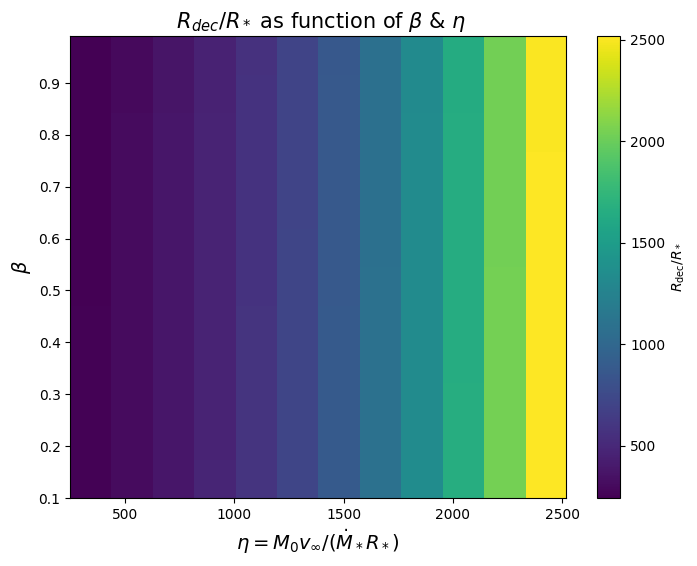

In [ ]:
B, E = np.meshgrid(beta, eta, indexing='ij')

plt.figure(figsize=(8,6))
im = plt.imshow(Rdec_ratio,
                origin='lower',
                extent=[eta.min(), eta.max(), beta.min(), beta.max()],
                aspect='auto',
                cmap='viridis')
plt.colorbar(im, label=r"$R_{\mathrm{dec}}/R_*$")
plt.xlabel(r"$\eta = M_0 v_\infty / (\dot{M}_* R_*)$",fontsize=14)
plt.ylabel(r"$\beta$",fontsize=14)
plt.title(" $R_{dec}/R_*$ as function of $\\beta$ & $\\eta$",fontsize=15)
#plt.xscale('log')
plt.show()


/tmp/ipython-input-4274442958.py:18: UserWarning: Adding colorbar to a different Figure <Figure size 1600x600 with 4 Axes> than <Figure size 1600x600 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(c, ax=ax[0], label=r'$I(ratio, \beta)$')
/tmp/ipython-input-4274442958.py:26: UserWarning: Adding colorbar to a different Figure <Figure size 1600x600 with 4 Axes> than <Figure size 1600x600 with 4 Axes> which fig.colorbar is called on.
  fig.colorbar(c2, ax=ax[1], label=r'$Ratio(\eta, \beta)$')


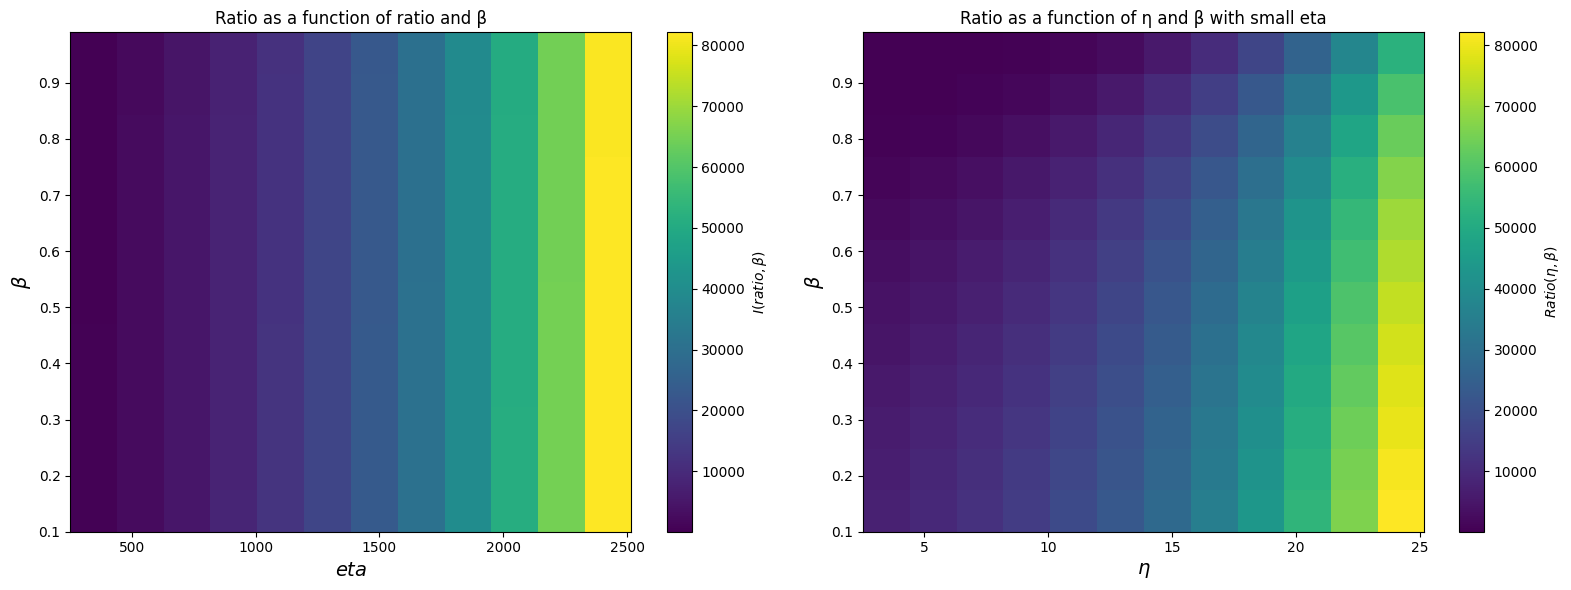

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16, 6))

# el plot en sí mismo
ax[0].imshow(Rdec_ratio,origin='lower',
                extent=[eta.min(), eta.max(), beta.min(), beta.max()],
                aspect='auto', cmap='viridis')

ax[1].imshow(Rdec_ratio2,origin='lower',
                extent=[eta2.min(), eta2.max(), beta.min(), beta.max()],
                aspect='auto', cmap='viridis')


# labels and colorbar
ax[0].set_xlabel(r'$eta$', fontsize=14)
ax[0].set_ylabel(r'$\beta$', fontsize=14)
ax[0].set_title('Ratio as a function of ratio and β')

fig.colorbar(c, ax=ax[0], label=r'$I(ratio, \beta)$')


# labels and colorbar
ax[1].set_xlabel(r'$\eta$', fontsize=14)
ax[1].set_ylabel(r'$\beta$', fontsize=14)
ax[1].set_title('Ratio as a function of η and β with small eta')

fig.colorbar(c2, ax=ax[1], label=r'$Ratio(\eta, \beta)$')

plt.tight_layout()
plt.show()

Ahora para fijar un valor de eta we use the estimated values for $M_{ej}$ listed in [José, jordi $ Hernanz Margarita+2025](https://ui.adsabs.harvard.edu/abs/2025A%26A...698A.251J/abstract)

## Estimaciones de R_dec y t_dec para RS oph y T-CrB

In [ ]:
#para T-CrB
#### ahora para RS oph   también cambia un poco m_ej pero los valores son controversiales asi que mantenemos el mismo por simplicidad
m_ej= np.linspace(0.381,2.29,20)*1E-6  *M_sun

M_d=  5E-8                  # en Msun/yr
M_dot= M_d*M_sun/(3.154E7)  # en kg/s

R_dec_TCrB= m_ej*v_inf/(M_dot)  # en m

R_dec_avg= np.mean(R_dec)
R_dec_std= np.std(R_dec)
print(min(R_dec_TCrB)/3.09E16,max(R_dec_TCrB)/3.09E16)
print('el radio de desaceleración es approx',R_dec_avg/3.09E16, 'parsecs'  )

0.00023333475728155344 0.0014024582524271845
el radio de desaceleración es approx 0.001672831715210356 parsecs


In [ ]:
#### ahora para RS oph   también cambia un poco m_ej pero los valores son controversiales asi que mantenemos el mismo por simplicidad
m_ej= np.linspace(0.381,2.29,20)*1E-6  *M_sun
M_dot_mks= (1E-7*M_sun)/(365*24*3600)     #higher accretion rate needed cause prec is shorter
R_dec_RS_oph= m_ej*v_inf/(1.4*M_dot_mks)    # in m

print(min(R_dec_RS_oph)/3.09E16,max(R_dec_RS_oph)/3.09E16)
print('el radio de desaceleración es approx',R_dec_avg/3.09E16, 'parsecs'  )


8.332327323162275e-05 0.0005008144244105409
el radio de desaceleración es approx 0.001672831715210356 parsecs


In [ ]:
v_0= 5E6 #m/s
tdec_RS_oph=  R_dec_RS_oph/ v_0
tdec_TcrB=    R_dec_TCrB/ v_0

sec_per_d= 60*60*24   # secconds in a day to retrieve tdec in days

print(min(tdec_RS_oph)/sec_per_d,max(tdec_RS_oph)/sec_per_d)
print(min(tdec_TcrB)/sec_per_d,max(tdec_TcrB)/sec_per_d)

5.959928571428572 35.82214285714286
16.68991666666667 100.31472222222222


## En T-CrB the companion fills its roche lobe? and what is the value estimated for M_BHL as mass transfer mechanism?

Here we look the condition for the 2dary star in T-CrB to fill its Roche lobe and we estimate the values of $\dot M_{BHL}$ and $\dot M_{RLOF}$ for the same system

 [Hinkle+25](https://)

##Filling condition

In [ ]:
G= 6.67*1E-11 # en mks
P= 227*86400 #orbital period (sec)
R_sun= 6.957E8  # en m


q1= 0.3198     #parallax as free param
Msum1= 1.729*1.989E30 # en kg

q2= 0.4927     #with gaia parallax
Msum2= 2.06*1.989E30  # en kg

a1 = ((P**2 * G * Msum1) / (4 * (np.pi**2)))**(1/3) # en m
a2 = ((P**2 * G * Msum2) / (4 * (np.pi**2)))**(1/3) # en m

R_rl1= (a1*0.49*q1**(2/3))/(0.6*q1**(2/3)+np.log(1+q1**(1/3)))
R_rl2= (a2*0.49*q2**(2/3))/(0.6*q2**(2/3)+np.log(1+q2**(1/3)))

print(a1,a2)
print(R_rl1,R_rl2)


130744980405.1793 138606128570.5499
37371823349.91789 44298878076.119995


In [ ]:
au= 1.496*1E11 #m
print(a1/au,a2/au)


0.8739637727618937 0.9265115546159752


In [ ]:
R_rg_1= 54*R_sun
R_rg_2= 63.4*R_sun
print(R_rg_1/R_rl1,'y con gaia', R_rg_1/R_rl2)
print(R_rg_2/R_rl1,'y con gaia', R_rg_2/R_rl2)

1.005243968115956 y con gaia 0.8480530801580619
1.180230881084289 y con gaia 0.995677134852243


So aparently the secondary stars does fill its Roche lobe, at least with the masses determined by the free parameter distance

Qué pasa con RS Oph?

In [ ]:
G= 6.67*1E-11 # en mks
P= 453.6*86400 #orbital period (sec)

AU= 1.496E11

R_rg= ((50+80)*R_sun)/2     #50-80
M_wD= 1.35 *M_sun # Hachisu et al 2007
M_rg= ((0.68+0.8)*M_sun)/2            # 0,68–0,80 Brandi et al seleccionamos el promedio
q= M_rg/M_wD
a=  ((1.425+1.502)*AU )/ 2             #1.425-1.502
R_rl= (a*0.49*q**(2/3))/(0.6*q**(2/3)+np.log(1+q**(1/3)))
print(R_rg/R_rl)

0.6292265817561741


## Mass transfer mechanism evaluations
We go first with the Bondy-Hoyle-Littleton mechanism that is written:
$$\dot M_{BHL}= \frac{1}{2} (\frac{GM_{WD}}{av_{\infty}^2})^2\dot M_{RG}$$

In [ ]:
#Evaluation of M_BHL

M_sun= 1.989*10**30 # en kg
Mwd=1.31*M_sun # en kg
v_wind= 3E4 #en m/s
Mass_loss= (1E-8*M_sun)/(365.25*24*3600)
M_BHL= 0.25*(((2*G*Mwd)/(a1*v_wind**2))**2)*Mass_loss # en kg/s
M_BHL= M_BHL/(M_sun/ (365.25*24*3600))

print(M_BHL)

2.1813670959343325e-08


We have to note that this value is an upper limit because we are not considering the contribution of the speed of sound as we see in [Bondi 1952](https://ui.adsabs.harvard.edu/abs/1952MNRAS.112..195B/abstract)

Then we look for the RLOF mechanism that is written:
$$\dot M_{RLOF}= \frac{\pi \rho C_s^3}{2k \Omega^2}$$


With $C_s$ and $\rho$ the sound speed and the density at L1, k a factor of order unity and $\Omega$ the angular velocity. For $C_s$ we have a few kilemeters per second, i.e:  5-6 km/s, this asuming that the pressure is the ideal gas pressure in an isothermic case so $\gamma$=1 and $C_s= \gamma kT/\mu m_p$  using Teff from the system we get the value of Cs and we have to look for omega and rho.



In [ ]:
Teff= 3525 # in K (distance as free param)
k= 1.38E-23    # botlzman cts
mp= 1.67E-27  #proton mass

R_rg= 71*R_sun  #from Munari+2025
M_RG= 0.419* M_sun


# vwind= cs
Cs_m=np.sqrt(k*Teff/(mp))
Cs= np.sqrt(k*Teff/(mp))/1000    # pasamos a km s
rho= (M_d*(M_sun/(365.25*24*3600)))/(4*np.pi*R_rg**2*Cs_m)      #MALOOOO esta es para wind accretion
rho_ficticio= 1E-3  #kg/m^3
print(f'la velocidad del sonido alrededor de L1 es={Cs:.2f} km/s')
print('la densidad alrededor de L1 es:',rho)

la velocidad del sonido alrededor de L1 es=5.40 km/s
la densidad alrededor de L1 es: 1.9044491618199493e-11


In [ ]:
omega= 2*np.pi/P    # in seconds
print('la velocidad angular es:', omega)

M_RLOF= ((np.pi/2)*rho_ficticio*Cs_m**3)/(omega**2) #en kg/s
M_RLOF= M_RLOF/(M_sun/ (365.25*24*3600))
print(' M_RLOF es', M_RLOF)

la velocidad angular es: 1.6032198449389418e-07
 M_RLOF es 0.15243528457792652


este valor es demasiado alto!!! o bien rho debe ser varios ordenes de magnitud más bajo, pero no parece según el daigne.

In [ ]:
#usando el valor que sugirió Ileyk
rho_cgs= 1E-12
rho_mks= rho_cgs *1E3   # 1E-9

M_RLOF= ((np.pi/2)*rho_mks*Cs_m**3)/(omega**2) #en kg/s
M_RLOF= M_RLOF/(M_sun/ (365.25*24*3600))
print(' M_RLOF es', M_RLOF)


 M_RLOF es 1.5243528457792653e-07


Un valor Mucho más consistente y que es también mayor a M_BHL, lo que queda pensiente es saber de donde se obtiene rho o como podemos modelarlo, de momento tenemos $\rho_{L1}= \frac{1}{\sqrt e}\rho_{ph}exp(-\frac{R_{rl}-R_*}{H_p})$ from [Ritter 1988](https://ui.adsabs.harvard.edu/abs/1988A%26A...202...93R/abstract) y en particular from the same paper we have another aproach to estimate the $\dot M_{RLOF}$ that is given by:

$$ -\dot M= \dot M_0 exp(\frac{R_{rl}-R_*}{H_p}) $$


Also for the photospheric density we have values of $\rho \sim 8*10^{-6} kg/m^3$  from [Jan E.Staff+2016](https://ui.adsabs.harvard.edu/abs/2016MNRAS.458..832S/abstract) or $\rho \sim 9.3*10^{-7} kg/m^3$ for AGB stars [Noam Soker and Amos Harpaz+2002](https://ui.adsabs.harvard.edu/abs/2002astro.ph.10586S/abstract)

In [ ]:
gamma= 0.954+0.025*np.log(q2)-0.038*np.log(q2)**2
Hp= ((8.314*Teff*R_rl1**2 )/G*M_RG)/gamma
M_dot_mks= (1E-8*M_sun)/(365*24*3600)
M_RLOF_r= M_dot_mks*np.exp(-(R_rl1-R_rg)/Hp)
M_RLOF_r= M_RLOF_r/(M_sun/ (365.25*24*3600))
print('usando el approach the Ritter 1988, M_RLOF:',M_RLOF)


rho_ph= 9.3*1E-7
rho_l1= 1/(np.sqrt(2.71)) * rho_ph * np.exp(-(R_rl1-R_rg)/Hp)

M_RLOF_d= ((np.pi/2)*rho_l1*Cs_m**3)/(omega**2) #en kg/s
M_RLOF_d= M_RLOF_d/(M_sun/ (365.25*24*3600))
print(' M_RLOF con approach de Daigne', M_RLOF_d, 'usando rho_l1=',rho_l1)

usando el approach the Ritter 1988, M_RLOF: 1.5243528457792653e-07
 M_RLOF con approach de Daigne 8.611599204948462e-05 usando rho_l1= 5.649347674846319e-07


In [ ]:
M_RLOF_min= 1E-9 *M_sun/ (365.25*24*3600)
M_RLOF_max= 1E-8 *M_sun/ (365.25*24*3600)

rho_min= omega**2 *M_RLOF_min/((np.pi/2)*Cs_m**3)
rho_max= omega**2 *M_RLOF_max/((np.pi/2)*Cs_m**3)

print(rho_min,rho_max)



6.560160941535749e-12 6.560160941535746e-11


but lets use the Kipenhahn and Weigert formula:
$$\rho_{ph}= \frac{2\mu m_H}{3k_B}\frac{GM}{R^2\kappa T}$$

In [ ]:
mH= 1.67*10E-27 # es la misma que mp
kappa= np.linspace(0.2,0.001,20) # it can be more precice if we use OPAL opacities but is just an aproximation so...
rho_ph= (2*mH *G*M_RG )/(3*k*Teff*R_rg**2*kappa)
print(min(rho_ph),max(rho_ph))

rho_l1= 1/(np.sqrt(2.71)) * rho_ph * np.exp(-(R_rl1-R_rg)/Hp)
print(min(rho_l1),max(rho_l1))

M_RLOF_min= ((np.pi/2)*min(rho_l1)*Cs_m**3)/(omega**2) #en kg/s
M_RLOF_min= M_RLOF_min/(M_sun/ (365.25*24*3600))

M_RLOF_max= ((np.pi/2)*max(rho_l1)*Cs_m**3)/(omega**2) #en kg/s
M_RLOF_max= M_RLOF_max/(M_sun/ (365.25*24*3600))

print(' M_RLOF min es:', M_RLOF_min, 'y max es:',M_RLOF_max)



2.6071795714269983e-08 5.214359142853997e-06
1.583748801048165e-08 3.1674976020963307e-06
 M_RLOF min es: 2.4141919918772694e-06 y max es: 0.000482838398375454


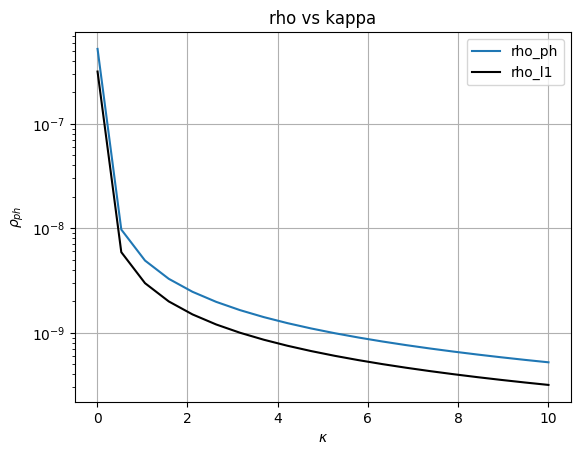

In [ ]:
kappa= np.linspace(10,0.01,20)

rho_ph= (2*mH *G*M_RG )/(3*k*Teff*R_rg**2*kappa)
rho_l1= 1/(np.sqrt(2.71)) * rho_ph * np.exp(-(R_rl1-R_rg)/Hp)


M_RLOF_d= ((np.pi/2)*(rho_l1)*Cs_m**3)/(omega**2) #en kg/s
M_RLOF_d= M_RLOF_d/(M_sun/ (365.25*24*3600))

plt.plot(kappa,rho_ph,label= 'rho_ph')
plt.title( 'rho vs kappa')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\rho_{ph}$')
plt.yscale('log')
plt.plot(kappa,rho_l1,label='rho_l1',c='black')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\rho_{ph}$')
plt.grid('on')
plt.legend()
plt.show()

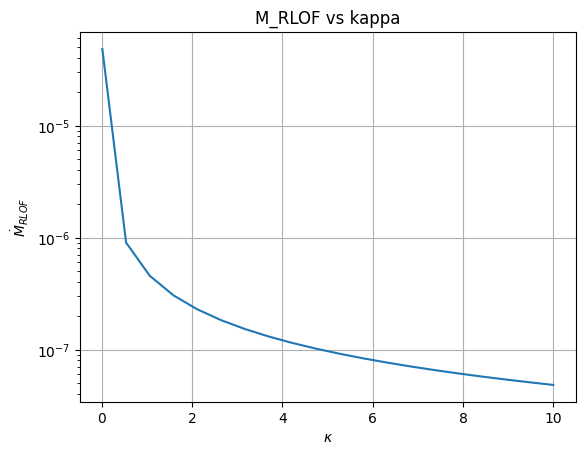

In [ ]:
plt.plot(kappa,M_RLOF_d)
plt.title( 'M_RLOF vs kappa')
plt.yscale('log')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\dot M_{RLOF}$')
plt.grid('on')
plt.show()

In [ ]:
kappa=5
rho_ph= (2*mH *G*M_RG )/(3*k*Teff*R_rg**2*kappa)
rho_l1= 1/(np.sqrt(2.71)) * rho_ph * np.exp(-(R_rl1-R_rg)/Hp)

M_RLOF_min= ((np.pi/2)*(rho_l1)*Cs_m**3)/(omega**2) #en kg/s
M_RLOF_min= M_RLOF_min/(M_sun/ (365.25*24*3600))
print(' M_RLOF  es:', M_RLOF_min)


 M_RLOF  es: 9.65676796750908e-08


ValueError: x and y must have same first dimension, but have shapes (20,) and (100,)

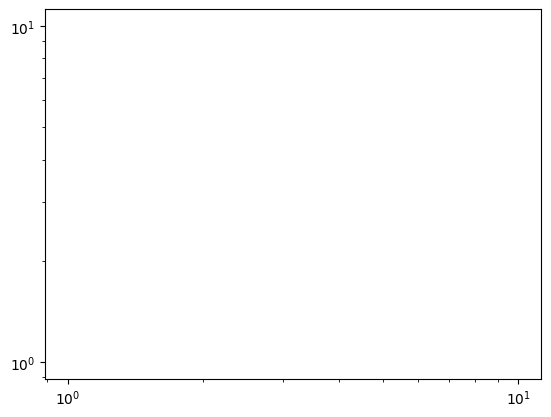

In [ ]:
m_ej= np.linspace(0.381,2.29,20)*1E-6     # en masas solares
gamma= 0.954+0.025*np.log(q2)-0.038*np.log(q2)**2
Hp= ((8.314*Teff*R_rl1**2 )/G*M_RG)/gamma
M_dot_mks= (1E-8*M_sun)/(365*24*3600)
M_RLOF_r= M_dot_mks*np.exp(-(R_rl1-R_rg)/Hp)
M_RLOF_r= M_RLOF_r/(M_sun) # en segundos

R_dec_TCrB= m_ej*v_inf/(M_RLOF_r)

plt.loglog(m_ej,R_dec)
plt.title('Deceleration radius as fn of the jected mass')
plt.xlabel(r'$M_{ej}$')
plt.ylabel(r'$R_{dec}$')
plt.grid('on')
plt.show()